### Implementing simple Chatbot Using LangGraph

In [1]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

#os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


In [4]:
# from langchain_openai import ChatOpenAI
# llm=ChatOpenAI(model="gpt-4o")
# llm.invoke("Hello")

In [6]:
from langchain_groq import ChatGroq

llm_groq=ChatGroq(model="qwen/qwen3-32b")
llm_groq.invoke("Hey I am Ram and i like to play cricket")

AIMessage(content="<think>\nOkay, so the user is Ram and he likes playing cricket. Let me start by greeting him and acknowledging his interest. Cricket is a popular sport, so I should ask him about his favorite team or player to keep the conversation going. Maybe he plays a specific position, like batting or bowling. I can ask if he enjoys watching matches or if he plays with friends. Also, mentioning different formats like T20s or Test matches might be good. I should keep the tone friendly and open-ended to encourage him to share more. Let me make sure my response is welcoming and shows genuine interest in his hobby.\n</think>\n\nHello Ram! That's awesome—you're in for a great time with cricket! 🏏 Whether it's batting, bowling, or fielding, there's something exciting about every aspect of the game. \n\nDo you have a favorite cricket team or player? And do you play with friends or watch a lot of matches online? I’d love to hear more about how you got into the sport! 😊", additional_kwar

### We Will start With Creating Nodes

In [7]:
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

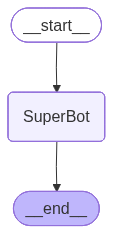

In [8]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile()


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [9]:
## Invocation

graph_builder.invoke({'messages':"Hi,My name is Ram And I like cricket"})

{'messages': [HumanMessage(content='Hi,My name is Ram And I like cricket', additional_kwargs={}, response_metadata={}, id='7ad465a7-f5bc-4e66-a893-2d01f204e293'),
  AIMessage(content="<think>\nOkay, the user introduced himself as Ram and mentioned he likes cricket. Let me start by greeting him and acknowledging his name. Since he's into cricket, maybe we can have a friendly chat about it. I should ask him what he enjoys most about the game to keep the conversation going. I need to make sure the response is warm and encouraging, using emojis to keep it light. Let me check if there's anything else I need to add. Oh, maybe ask if he plays or just watches. That should cover it. Keep the tone friendly and open-ended.\n</think>\n\nHello Ram! 🏏 That's awesome! Cricket is such a thrilling sport—whether you're playing it or just watching, it's full of excitement! What's your favorite part about it? The strategy, the fast-paced action, or maybe the big moments like a six or a well-timed catch? 😊

#### Streaming The responses

In [10]:
for event in graph_builder.stream({"messages":"Hello My name is Ram"}):
    print(event)

{'SuperBot': {'messages': [AIMessage(content="<think>\nOkay, the user introduced himself as Ram. I should respond in a friendly and welcoming manner. Let me make sure to acknowledge his name and offer assistance. I'll keep it simple and open-ended so he feels comfortable asking for help with whatever he needs.\n</think>\n\nHello, Ram! Nice to meet you. How can I assist you today? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 74, 'prompt_tokens': 13, 'total_tokens': 87, 'completion_time': 0.132582507, 'completion_tokens_details': None, 'prompt_time': 0.000508041, 'prompt_tokens_details': None, 'queue_time': 0.057008799, 'total_time': 0.133090548}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_5cf921caa2', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b54c9-5e84-7870-bbcd-10d9e8b565b7-0', usage_metadata={'input_tokens': 13, 'output_tokens': 74, 'total_tokens': 87})]}}
